In [73]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
## load data
df = pd.read_excel("C://Users//lisa.hornung//Documents//Projects//makeover-monday//20210328//UK_EU_trade_by_month.xlsx")

In [4]:
df.head()

,Year,Month,SITC0_Exports,SITC0_Imports,SITC0_Balance,SITC1_Exports,SITC1_Imports,SITC1_Balance,SITC2_ Exports,SITC2_Imports,...,SITC6_Balance,SITC7_Exports,SITC7_Imports,SITC7_Balance,SITC8_Exports,SITC8_Imports,SITC8_Balance,SITC9_Exports,SITC9_Imports,SITC9_Balance
0,1997,Jan,384,710,-326,144,224,-80,132,226,...,-226,3614,3610,4,924,950,-26,0,7,-7
1,1997,Feb,410,715,-305,168,223,-55,117,228,...,-169,3664,3556,108,908,939,-31,5,5,0
2,1997,Mar,394,724,-330,165,223,-58,125,218,...,-201,3681,3745,-64,903,882,21,9,8,1
3,1997,Apr,406,836,-430,157,232,-75,135,254,...,-148,3722,3772,-50,961,941,20,5,9,-4
4,1997,May,409,736,-327,160,221,-61,139,225,...,-147,3524,3696,-172,881,890,-9,11,7,4


In [54]:
# create lists for export and import columns to sum it
cols_exports = []
cols_imports = []

for column in df.columns.to_list():
    if "Exports" in column:
        i = column
        cols_exports.append(i)
    elif "Imports" in column:
        cols_imports.append(column)

# create total columns
df["total_exports"] = df[cols_exports].sum(axis=1)
df["total_imports"] = df[cols_imports].sum(axis=1)
df["total_balance"] = df["total_exports"] - df["total_imports"]

In [55]:
# create % change columns

i = 1
perc_change_exports = [0]
perc_change_imports = [0]

while i < len(df):
    exports = (df["total_exports"][i] - df["total_exports"][i-1])/df["total_exports"][i-1]
    imports = (df["total_imports"][i] - df["total_imports"][i-1])/df["total_imports"][i-1]
    perc_change_exports.append(exports)
    perc_change_imports.append(imports)
    i+=1

df["perc_change_exports"] = perc_change_exports
df["perc_change_imports"] = perc_change_imports

In [ ]:
# create single date columns
df["date"] = pd.to_datetime(df['Year'].map(str) + '-' + df['Month'].map(str))

In [71]:
df

,Year,Month,SITC0_Exports,SITC0_Imports,SITC0_Balance,SITC1_Exports,SITC1_Imports,SITC1_Balance,SITC2_ Exports,SITC2_Imports,...,SITC8_Balance,SITC9_Exports,SITC9_Imports,SITC9_Balance,total_exports,total_imports,perc_change_exports,perc_change_imports,total_balance,date
0,1997,Jan,384,710,-326,144,224,-80,132,226,...,-26,0,7,-7,8362,8518,0.000000,0.000000,-156,1997-01-01
1,1997,Feb,410,715,-305,168,223,-55,117,228,...,-31,5,5,0,8418,8422,0.006697,-0.011270,-4,1997-02-01
2,1997,Mar,394,724,-330,165,223,-58,125,218,...,21,9,8,1,8328,8546,-0.010691,0.014723,-218,1997-03-01
3,1997,Apr,406,836,-430,157,232,-75,135,254,...,20,5,9,-4,8387,8788,0.007085,0.028317,-401,1997-04-01
4,1997,May,409,736,-327,160,221,-61,139,225,...,-9,11,7,4,8088,8477,-0.035650,-0.035389,-389,1997-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2020,Sep,858,2365,-1507,241,670,-429,226,531,...,-856,7,56,-49,11947,19803,-0.002588,0.058022,-7856,2020-09-01
285,2020,Oct,887,2404,-1517,232,694,-462,226,571,...,-776,28,52,-24,12830,20448,0.073910,0.032571,-7618,2020-10-01
286,2020,Nov,936,2528,-1592,241,712,-471,245,574,...,-798,33,67,-34,13272,22190,0.034451,0.085192,-8918,2020-11-01
287,2020,Dec,1033,2540,-1507,228,671,-443,264,627,...,-868,18,65,-47,13676,22791,0.030440,0.027084,-9115,2020-12-01


## start exploring

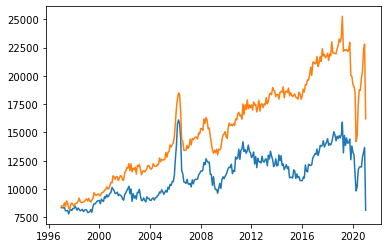

In [76]:
### multiple lines

x = df["date"]

y1 = df["total_exports"]
y2 = df["total_imports"]
y3 = df["total_balance"]
  
plt.plot(x, y1, label = "Exports")
plt.plot(x, y2, label = "Imports")
#plt.plot(x, y3, label = "Balance")

plt.show()

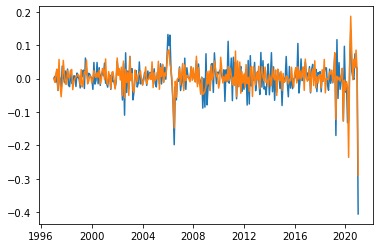

In [77]:
### multiple lines

x = df["date"]

y1 = df["perc_change_exports"]
y2 = df["perc_change_imports"]

  
plt.plot(x, y1, label = "Exports")
plt.plot(x, y2, label = "Imports")
#plt.plot(x, y3, label = "Balance")

plt.show()

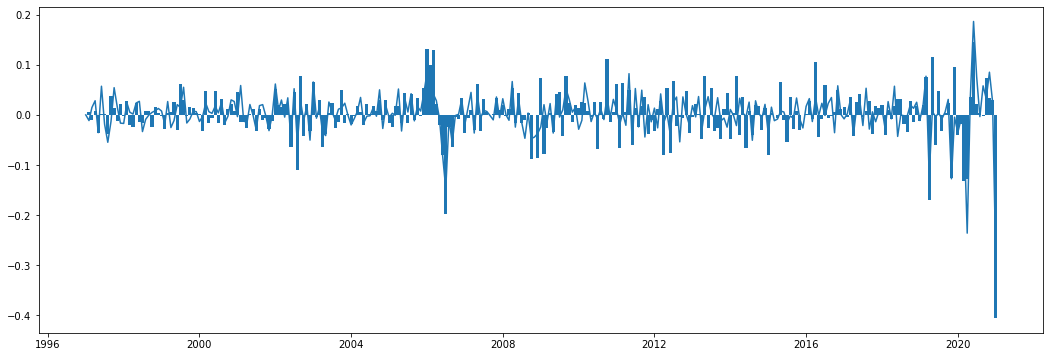

In [97]:
fig, ax = plt.subplots(figsize=(18, 6))

x = df["date"]

y1 = df["perc_change_exports"]
y2 = df["perc_change_imports"]


# Define bar width. We'll use this to offset the second bar.
bar_width = 0.5

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, y1, label = "Exports", width=30)
plt.plot(x, y2, label = "Imports")


ax.xaxis_date()


In [ ]:
### multiple lines

x = df["date"]

y1 = df["total_exports"]
y2 = df["total_imports"]
y3 = df["total_balance"]
  
plt.plot(x, y1, label = "Exports")
plt.plot(x, y2, label = "Imports")
#plt.plot(x, y3, label = "Balance")

plt.show()